# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
import csv
import datetime
import time
from citipy import citipy
import random
from scipy.stats import linregress

# Google API Key
from api_keys import g_key

#random.seed(333)

## Generate Cities List

In [2]:
# Setup the ranges for latitude and longitude
latitude_range = (-90,90)
longatude_range = (-180,180)

# Create variables for data
cities = []

no_cities = 2000
for cntr in range(no_cities):
    latitude = random.uniform(latitude_range[0],latitude_range[1])
    longitude = random.uniform(longatude_range[0],longatude_range[1])
    
    # If we have chosen a latitude of 0 then we don't want 
    # to use that latitude and longitude
    if latitude != 0:
        city = citipy.nearest_city(latitude,longitude)
        city_name = city.city_name
        city_country = city.country_code
        
        # Only add if we have not already chosen the city and country combination
        if not any(c['name'] == city_name and c['country'] == city_country for c in cities):
            city_dict = {'name': city_name,'country': city_country}
            cities.append(city_dict)

In [3]:
# Output cities to verify
print(cities)

[{'name': 'bluff', 'country': 'nz'}, {'name': 'sao joao da barra', 'country': 'br'}, {'name': 'ushuaia', 'country': 'ar'}, {'name': 'ponta do sol', 'country': 'cv'}, {'name': 'high level', 'country': 'ca'}, {'name': 'victoria', 'country': 'sc'}, {'name': 'la ronge', 'country': 'ca'}, {'name': 'nerchinskiy zavod', 'country': 'ru'}, {'name': 'vrangel', 'country': 'ru'}, {'name': 'souillac', 'country': 'mu'}, {'name': 'sfantu gheorghe', 'country': 'ro'}, {'name': 'tsihombe', 'country': 'mg'}, {'name': 'komsomolskiy', 'country': 'ru'}, {'name': 'taolanaro', 'country': 'mg'}, {'name': 'albany', 'country': 'au'}, {'name': 'raudeberg', 'country': 'no'}, {'name': 'vaini', 'country': 'to'}, {'name': 'nikolskoye', 'country': 'ru'}, {'name': 'hermanus', 'country': 'za'}, {'name': 'qaanaaq', 'country': 'gl'}, {'name': 'prince rupert', 'country': 'ca'}, {'name': 'new norfolk', 'country': 'au'}, {'name': 'kerema', 'country': 'pg'}, {'name': 'songkhla', 'country': 'th'}, {'name': 'havoysund', 'countr

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Create empty lists for all of the data we want to collect
city_id = []
city_name = []
city_cloudiness = []
city_country = []
city_date = []
city_humidity = []
city_latitude = []
city_longitude = []
city_temperature = []
city_wind_speed = []


# Build partial query URL
query_url = f"{base_url}appid={g_key}&units={units}&q="

# Initialize our loop variables
city_cntr = -1
no_cities_to_retrieve = 525


# Loop through cities
for index, city in enumerate(cities):
    
    # See if we need to sleep so we don't go over our 60 a minute max for the api
    q, mod = divmod(index+1,55)
    
    if mod == 0:
        print("Pausing for a minute so we don't go over the api calls per minute limit!")
        time.sleep(60)
    
    # Retrieve data information for a city
    try:
        city_json = requests.get(query_url + city['name'] + ', ' + city['country']).json()
    except:
        print(f"City not found - {city['name']}, {city['country']} - skipping")

    if city_json['cod'] == 200:
        city_cntr += 1
        print(f"Retrieved data for {city_cntr}-{city_json['name']}, {city_json['sys']['country']} ({city_json['coord']['lat']},{city_json['coord']['lon']})")
        
        city_id.append(city_cntr)
        city_name.append(city_json['name'])
        city_cloudiness.append(city_json['clouds']['all'])
        city_country.append(city_json['sys']['country'])
        city_date.append(city_json['dt'])
        city_humidity.append(city_json['main']['humidity'])
        city_latitude.append(city_json['coord']['lat'])
        city_longitude.append(city_json['coord']['lon'])
        city_temperature.append(city_json['main']['temp_max'])              
        city_wind_speed.append(city_json['wind']['speed'])
    else:
        print(f"Problem getting city weather for {city['name']}, {city['country']} - skipping")     
    
    # If we have reached our target number of cities than stop
    if city_cntr+1 == no_cities_to_retrieve:
        break
    
          

Retrieved data for 0-Bluff, NZ (-46.6,168.33)
Retrieved data for 1-São João da Barra, BR (-21.64,-41.05)
Retrieved data for 2-Ushuaia, AR (-54.8,-68.3)
Retrieved data for 3-Ponta do Sol, CV (17.2,-25.09)
Retrieved data for 4-High Level, CA (58.52,-117.14)
Retrieved data for 5-Victoria, SC (-4.62,55.45)
Retrieved data for 6-La Ronge, CA (55.1,-105.28)
Retrieved data for 7-Nerchinskiy Zavod, RU (51.31,119.61)
Retrieved data for 8-Vrangel', RU (42.73,133.08)
Retrieved data for 9-Souillac, MU (-20.52,57.52)
Retrieved data for 10-Sfântu Gheorghe, RO (45.87,25.78)
Problem getting city weather for tsihombe, mg - skipping
Retrieved data for 11-Komsomol'skiy, RU (43.98,46.7)
Problem getting city weather for taolanaro, mg - skipping
Retrieved data for 12-Albany, AU (-35.02,117.89)
Retrieved data for 13-Raudeberg, NO (61.99,5.14)
Retrieved data for 14-Vaini, TO (-21.2,-175.2)
Retrieved data for 15-Nikolskoye, RU (59.7,30.79)
Retrieved data for 16-Hermanus, ZA (-34.42,19.23)
Retrieved data for 17-

Retrieved data for 139-Araouane, ML (18.9,-3.53)
Problem getting city weather for toliary, mg - skipping
Retrieved data for 140-Kapaa, US (22.08,-159.32)
Retrieved data for 141-Vao, NC (-22.67,167.48)
Retrieved data for 142-Makakilo City, US (21.35,-158.09)
Pausing for a minute so we don't go over the api calls per minute limit!
Retrieved data for 143-Sittwe, MM (20.15,92.9)
Retrieved data for 144-Poum, NC (-20.23,164.02)
Retrieved data for 145-Sitka, US (57.05,-135.33)
Retrieved data for 146-Celle, DE (52.62,10.08)
Retrieved data for 147-Laurinburg, US (34.77,-79.46)
Retrieved data for 148-Bathsheba, BB (13.22,-59.52)
Retrieved data for 149-Bengkulu, ID (-3.8,102.27)
Retrieved data for 150-Baharly, TM (38.44,57.43)
Retrieved data for 151-Olinda, BR (-8.01,-34.86)
Retrieved data for 152-Sur, OM (22.57,59.53)
Retrieved data for 153-Nanortalik, GL (60.14,-45.24)
Retrieved data for 154-São Luiz Gonzaga, BR (-28.41,-54.96)
Retrieved data for 155-Hīt, IQ (33.64,42.83)
Retrieved data for 156

Retrieved data for 268-Safford, US (32.83,-109.71)
Retrieved data for 269-Port Keats, AU (-14.25,129.55)
Retrieved data for 270-Shibetsu, JP (43.66,145.13)
Retrieved data for 271-Verāval, IN (20.9,70.37)
Retrieved data for 272-Nishihara, JP (26.18,127.76)
Retrieved data for 273-Tres Arroyos, AR (-38.37,-60.28)
Retrieved data for 274-Maniitsoq, GL (65.42,-52.9)
Retrieved data for 275-Camapuã, BR (-19.53,-54.04)
Retrieved data for 276-Bandarbeyla, SO (9.49,50.81)
Retrieved data for 277-Leshukonskoye, RU (64.9,45.76)
Retrieved data for 278-Caravelas, BR (-17.71,-39.25)
Retrieved data for 279-Zaragoza, MX (28.48,-100.92)
Retrieved data for 280-Artsyz, UA (45.99,29.42)
Retrieved data for 281-Boueni, YT (-12.9,45.08)
Retrieved data for 282-Nyurba, RU (63.28,118.33)
Retrieved data for 283-Port Macquarie, AU (-31.43,152.92)
Problem getting city weather for santa cruz de rosales, mx - skipping
Pausing for a minute so we don't go over the api calls per minute limit!
Retrieved data for 284-Touros

Retrieved data for 401-Joshīmath, IN (30.57,79.57)
Retrieved data for 402-Zapolyarnyy, RU (69.42,30.81)
Retrieved data for 403-Hvolsvollur, IS (63.75,-20.22)
Retrieved data for 404-Husavik, IS (66.04,-17.34)
Retrieved data for 405-Hiratachō, JP (35.43,132.82)
Retrieved data for 406-Kloulklubed, PW (7.04,134.26)
Retrieved data for 407-Sanford, US (28.8,-81.27)
Retrieved data for 408-San Fernando, US (34.28,-118.44)
Retrieved data for 409-Bukama, CD (-9.2,25.85)
Retrieved data for 410-Nouakchott, MR (18.09,-15.98)
Retrieved data for 411-Taoudenni, ML (22.68,-3.98)
Retrieved data for 412-Antofagasta, CL (-23.65,-70.4)
Retrieved data for 413-Chimoio, MZ (-19.12,33.48)
Retrieved data for 414-Mahon, ES (39.89,4.27)
Retrieved data for 415-Mokrousovo, RU (55.81,66.77)
Retrieved data for 416-Jieshi, CN (22.81,115.83)
Retrieved data for 417-Tynda, RU (55.17,124.72)
Retrieved data for 418-Çanakkale Province, TR (40.08,26.83)
Retrieved data for 419-Hay River, CA (60.82,-115.8)
Retrieved data for 4

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a DataFrame with the following columns:
# City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed

# Create the dictionary to store our information
city_data = {
             "City ID": city_id,
             "City": city_name,
             "Cloudiness": city_cloudiness,
             "Country": city_country,    
             "Date": city_date,
             "Humidity": city_humidity,
             "Lat": city_latitude,
             "Lng": city_longitude,
             "Max Temp": city_temperature,
             "Wind Speed": city_wind_speed
            }
# Define the DataFrame and set the index to City ID
city_df = pd.DataFrame(city_data)
city_df.set_index('City ID', inplace = True)

# Write the cities.csv file
csv_file_name = "../output_data/cities.csv"
city_df.to_csv(csv_file_name)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Get rid of any cities that have a humitidy greater than 100
cleaned_city_df = city_df[city_df['Humidity'] <= 100]

# Preview the cleaned data
cleaned_city_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Bluff,93,NZ,1603217426,92,-46.60,168.33,41.00,1.99
1,São João da Barra,75,BR,1603217426,65,-21.64,-41.05,78.80,16.11
2,Ushuaia,40,AR,1603217130,60,-54.80,-68.30,42.80,20.80
3,Ponta do Sol,18,CV,1603217426,52,17.20,-25.09,89.60,20.80
4,High Level,40,CA,1603217366,100,58.52,-117.14,12.20,2.24
...,...,...,...,...,...,...,...,...,...
520,Ryōtsu-minato,0,JP,1603218098,59,38.08,138.43,60.04,9.46
521,Talakan,100,RU,1603218099,78,50.32,130.37,39.25,8.72
522,Bristol,90,US,1603218084,82,41.83,-71.17,66.20,4.70


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [7]:
# Create a variable to store today's date
today = datetime.datetime.now().strftime('%m/%d/%Y')

In [8]:
def setup_labels(compare_what):
    ''' define the labels needed according to the passed type'''
    
    # Setup Labels and annotate positions
    
    # Information to create a plot for Temp
    if compare_what == 'Max Temp':
        plot_label = 'Maximum Temperature'
        y_label = "Maximum Temperature (F)"
        northern_annotate = (20,20)
        southern_annotate = (-30,50)
   
    # Information to create a plot for Humitiy
    elif compare_what == "Humidity":
        plot_label = "Humidity"
        y_label = "Humidity (%)"
        northern_annotate = (20,20)
        southern_annotate = (-40,40)

    # Information to create a plot for Cloudiness
    elif compare_what == "Cloudiness":
        plot_label = "Cloudiness"
        y_label = 'Cloudiness (%)'
        northern_annotate = (20,20)
        southern_annotate = (-40,80)         

    # Information to create a plot for Wind Speed    
    else:
        plot_label = "Wind Speed"
        y_label = "Wind Speed (mph)"
        northern_annotate = (30,14)
        southern_annotate = (-40,20)
        
    # Return the information
    return plot_label,y_label,northern_annotate,southern_annotate

In [9]:
def city_plot(df,compare_what):
    ''' Creatae a plot for our cicites using the passed in
        dataframe and plot type'''
    
    # Setup the x and y axis
    x_axis = df['Lat']
    y_axis = df[compare_what]

    # Setup the labels for our plot
    (plot_label, y_label, northern_annotate, southern_annotate) = setup_labels(compare_what)
    
    # Create the scatter plot
    plt.scatter(x_axis, y_axis)

    # Setup the title and labels
    plt.title(f'City Latitude vs. {plot_label} ({today})', fontsize=12)
    plt.xlabel('Latitude', fontsize=12)
    plt.ylabel(f'{y_label}', fontsize=12)
    plt.grid(True)
    
    # Save the plot
    compare_what_no_space = compare_what.replace(' ' ,'_')
    output_file = f'../output_data/city_{compare_what_no_space}.png'
    plt.savefig(output_file)
    
    # Show the scatter plot
    plt.show()

## Latitude vs. Temperature Plot

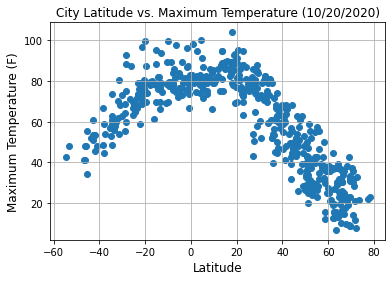

In [10]:
# Generate a scatter plot for Latitude vs. Temperature Plot
city_plot(cleaned_city_df,'Max Temp')

# Observation for Latitude vs Temperature
The further someone is away from the equator to the south, the lower the temperature. And conversely the further north from the equator the higher the temperature.

## Latitude vs. Humidity Plot

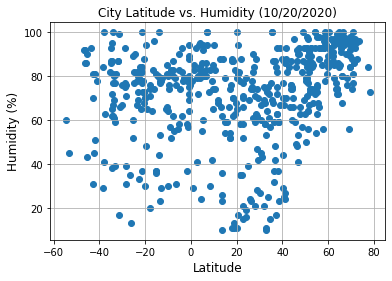

In [11]:
# Generate a scatter plot for Latitude vs. Humidity Plot
city_plot(cleaned_city_df,'Humidity')

# Observation for Humidity
There are quite a few points where the humitity is higher for both south of the equator and north of the equator but there are also quite a few points that do not exhibit this behavior.  So any correlection would be moderate or weak.

## Latitude vs. Cloudiness Plot

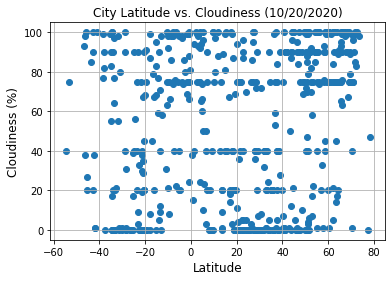

In [12]:
# Generate a scatter plot for Latitude vs. Cloudiness Plot
city_plot(cleaned_city_df,'Cloudiness')

# Observation for Cloudiness
The cloudiness points are distributed over the entire plot.  Therefore there would be "none or very weak" correletion between latitude and Cloudiness.

## Latitude vs. Wind Speed Plot

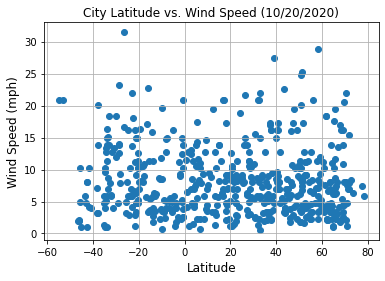

In [13]:
# Generate a scatter plot for Latitude vs. Wind Speed Plot
city_plot(cleaned_city_df,'Wind Speed')

# Observations for Wind Speed
There is not any correletion between Wind Speed and Latitude.   Most of the points are less than 20 mph with very few outliers.

## Linear Regression

In [14]:
def linear_regress(df,compare_what,hemisphere):
    ''' Process linear regression and plot for a given
        DataFrame, plot type and hemisphere'''
    
    # Restrict DataFrame for the requested hemisphere
    if hemisphere == 'Southern':
        hemisphere_df = df.loc[df['Lat'] < 0]
    else:
        hemisphere_df = df.loc[df['Lat'] > 0]
    
    # Set the x and y axis
    x_axis = hemisphere_df['Lat']
    y_axis =hemisphere_df[compare_what]

    # Perform the linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    
    # Setup the labels for our plot
    (plot_label, y_label, northern_annotate, southern_annotate) = setup_labels(compare_what)
    
    # Output the R value
    print(f"The R-Value between Latitude and {compare_what} is {round(rvalue,2)} for the {hemisphere} Hemisphere")

    # Get the regress values
    regress_values = x_axis * slope + intercept

    # Setup the line equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Generate the scatter plot for the line regression
    plt.scatter(x_axis,y_axis)

    # Inclue the line
    plt.plot(x_axis,regress_values,"r-")

    # Setup the labels and title for the plot
    plt.xlabel('Latitude', fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.title(f'City Latitude vs {plot_label} ({today})', fontsize=12)

    # Add the line equation
    if hemisphere == "Northern":
        plt.annotate(line_eq,(northern_annotate),fontsize=15,color="red")
    else:
        plt.annotate(line_eq,(southern_annotate),fontsize=15,color="red")

    # Save the plot
    compare_what_no_space = compare_what.replace(' ' ,'_')
    output_file = f'../output_data/{hemisphere}_Hemisphere_{compare_what_no_space}.png'
    plt.savefig(output_file)        
      
    # Show the chart
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The R-Value between Latitude and Max Temp is -0.9 for the Northern Hemisphere


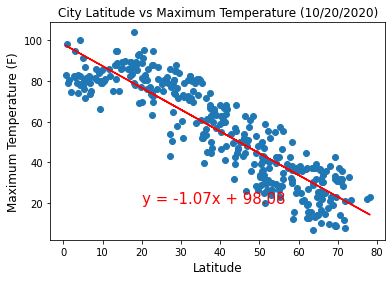

In [15]:
# Generate linear regression for Northern Hemisphere - Max Temp vs. Latitude
linear_regress(cleaned_city_df,'Max Temp','Northern')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The R-Value between Latitude and Max Temp is 0.77 for the Southern Hemisphere


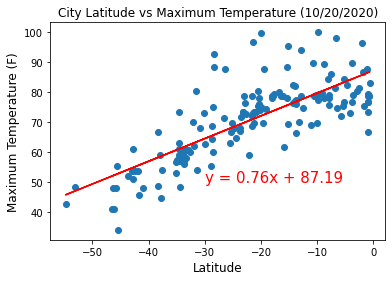

In [16]:
# Generate linear regression for Southern Hemisphere - Max Temp vs. Latitude
linear_regress(cleaned_city_df,'Max Temp','Southern')

# Observations for Maximum Temerature
There is a strong correlation between latitude and temperature for both Northern and Southern hemisperes.   It is a positive correctlation for the Southern hemisphere and a negative correlation for the Northern hemisphere.   Therefore as the latitude increases so do the temperature and as the latitude decreases so does the temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R-Value between Latitude and Humidity is 0.39 for the Northern Hemisphere


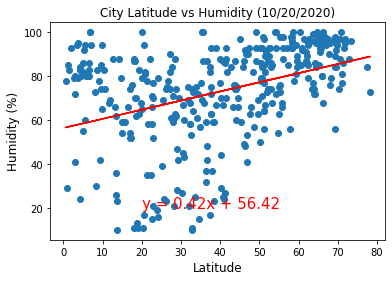

In [17]:
# Generate linear regression for Northern Hemisphere - Humidity (%) vs. Latitude
linear_regress(cleaned_city_df,'Humidity','Northern')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R-Value between Latitude and Humidity is 0.01 for the Southern Hemisphere


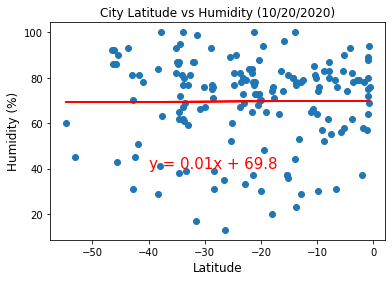

In [18]:
# Generate linear regression for Southern Hemisphere - Humidity (%) vs. Latitude
linear_regress(cleaned_city_df,'Humidity','Southern')

# Observaions for Humidity
There is  "weak" postitive correlation between latitude and humitity for the Southern Hemisphere but the Northern Hemisphere has "none or very weak" correclation.  I have gotten "none or very weak" and "weak" correlation for the Southern hemisphere during other runs but it is always one of those two.  Therefore no conclusions can be drwan for humidity from latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-Value between Latitude and Cloudiness is 0.28 for the Northern Hemisphere


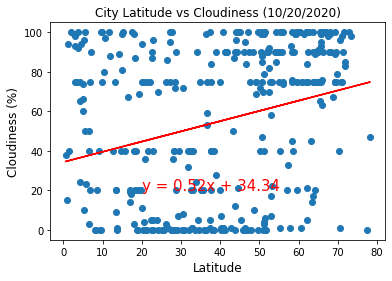

In [19]:
# Generate linear regression for Northern Hemisphere - Cloudiness (%) vs. Latitude 
linear_regress(cleaned_city_df,'Cloudiness','Northern')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-Value between Latitude and Cloudiness is 0.2 for the Southern Hemisphere


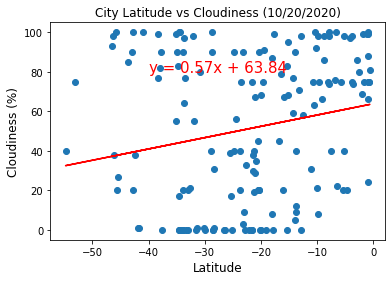

In [20]:
# Generate linear regression for Southern Hemisphere - Cloudiness (%) vs. Latitude
linear_regress(cleaned_city_df,'Cloudiness','Southern')

# Observaions for Cloudiness
The correlation for Cloudiness has "none or very weak" correlation for both the Northern and Southern hemispheres.  There can't be any conculsion drawn for Wind Speed from Cloudiness

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R-Value between Latitude and Wind Speed is -0.03 for the Northern Hemisphere


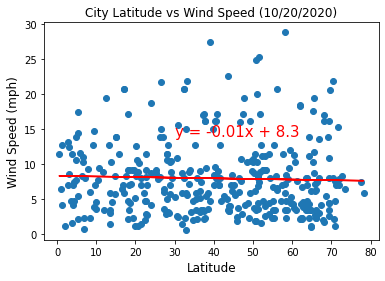

In [21]:
# Generate linear regression for Northern Hemisphere - Wind Speed (mph) vs. Latitude
linear_regress(cleaned_city_df,'Wind Speed','Northern')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R-Value between Latitude and Wind Speed is -0.11 for the Southern Hemisphere


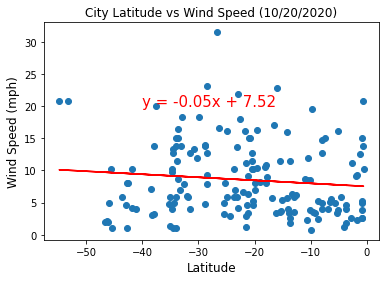

In [22]:
# Generate linear regression for Southern Hemisphere - Wind Speed (mph) vs. Latitude
linear_regress(cleaned_city_df,'Wind Speed','Southern')

# Observations for Wind Speed
The correlation for Wind Speed for both Northern and Southern hemisperes have "none or very weak correlation".   The Northern is postive and the Southern is negative.  There can't be any conculsion drawn for Wind Speed from Latitude.